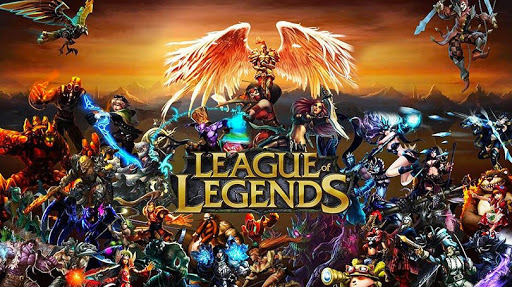

In [1]:
from IPython.display import Image

Image(filename='unnamed.jpg' ,width=1000000,
    height=1000000)

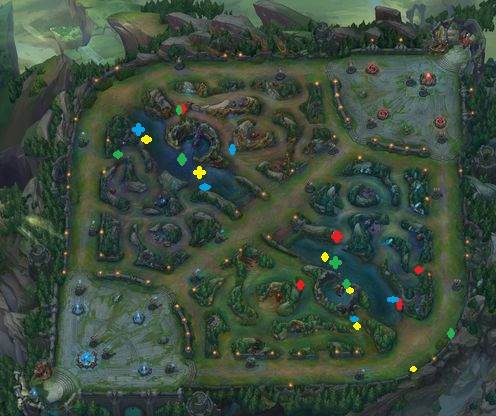

In [2]:
Image(filename='7c60bc82d8eb7d81932f69d0770aebb4.jpg' ,width=1000000,
    height=1000000)

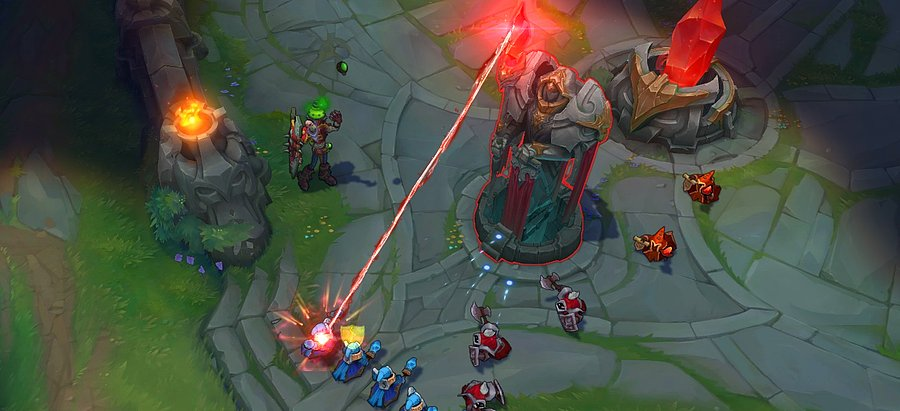

In [3]:
Image(filename='s-2e822c0dc15888356b8871230f9530962e6239dc.jpg' ,width=1000000,
    height=1000000)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
import plotly.express as px
from sqlalchemy import create_engine
import os
import pickle
warnings.filterwarnings('ignore')


In [5]:
df = pd.read_pickle('riotapi_lower_res')

pd.options.display.max_columns = None


df.head()

gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0  4519157822         0               28                   2               1   
1  4523371949         0               12                   1               0   
2  4521474530         0               15                   0               0   
3  4524384067         0               43                   1               0   
4  4436033771         0               75                   4               0   

   blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  \
0          9           6           11                  0            0   
1          5           5            5                  0            0   
2          7          11            4                  1            1   
3          4           5            5                  1            0   
4          6           6            6                  0            0   

   blueHeralds  blueTowersDestroyed  blueTotalGold  blueAvgLevel  \
0            0                    0          17210           6.6   
1            0                    0          14712           6.6   
2            0                    0          16113           6.4   
3            1                    0          15157           7.0   
4            0                    0          16400           7.0   

   blueTotalExperience  blueTotalMinionsKilled  blueTotalJungleMinionsKilled  \
0                17039                     195                            36   
1                16265                     174                            43   
2                16221                     186                            46   
3                17954                     201                            55   
4                18543                     210                            57   

   blueGoldDiff  blueExperienceDiff  blueCSPerMin  blueGoldPerMin  \
0           643                  -8          19.5          1721.0   
1         -2908               -1173          17.4          1471.2   
2         -1172               -1033          18.6          1611.3   
3         -1321                  -7          20.1          1515.7   
4         -1004                 230          21.0          1640.0   

   redWardsPlaced  redWardsDestroyed  redFirstBlood  redKills  redDeaths  \
0              15                  6              0         6          9   
1              12                  1              1         5          5   
2              15                  3              1        11          7   
3              15                  2              1         5          4   
4              17                  2              1         6          6   

   redAssists  redEliteMonsters  redDragons  redHeralds  redTowersDestroyed  \
0           8                 0           0           0                   0   
1           2                 2           1           1                   1   
2          14                 0           0           0                   0   
3          10                 0           0           0                   0   
4           7                 1           1           0                   0   

   redTotalGold  redAvgLevel  redTotalExperience  redTotalMinionsKilled  \
0         16567          6.8               17047                    197   
1         17620          6.8               17438                    240   
2         17285          6.8               17254                    203   
3         16478          7.0               17961                    235   
4         17404          7.0               18313                    225   

   redTotalJungleMinionsKilled  redGoldDiff  redExperienceDiff  redCSPerMin  \
0                           55         -643                  8         19.7   
1                           52         2908               1173         24.0   
2                           28         1172               1033         20.3   
3                           47         1321                  7         23.5   
4   

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 78 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [7]:
for col in df.columns:
    df[col].isnull().sum()

In [8]:
blue = df[df.blueWins==1].count().blueWins*100/df.shape[0]
red =df[df.blueWins==0].count().blueWins*100/df.shape[0]

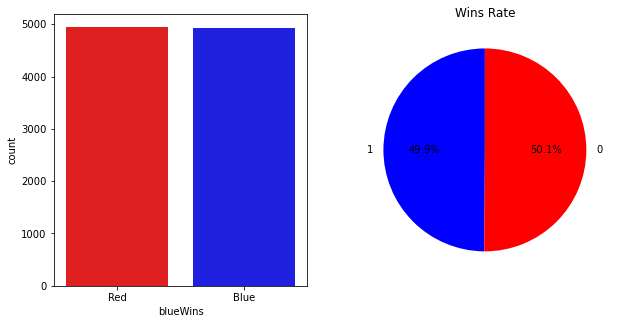

In [9]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x=df.blueWins, palette=sns.color_palette(['r','b']))
plt.xticks([0,1], ['Red', 'Blue']);

plt.subplot(1,2,2)

plt.title('Wins Rate')
color = [blue,red]
k=[1,0]
plt.pie(color, labels=k,autopct='%1.1f%%', startangle=90,colors =["b","r"])
plt.show()

In [10]:
pd.options.display.float_format = '{:.3f}'.format
df.describe().T.head(50)

count           mean          std  \
gameId                       9879.000 4500084044.846 27573278.491   
blueWins                     9879.000          0.499        0.500   
blueWardsPlaced              9879.000         22.288       18.019   
blueWardsDestroyed           9879.000          2.825        2.175   
blueFirstBlood               9879.000          0.505        0.500   
blueKills                    9879.000          6.184        3.011   
blueDeaths                   9879.000          6.138        2.934   
blueAssists                  9879.000          6.645        4.065   
blueEliteMonsters            9879.000          0.550        0.626   
blueDragons                  9879.000          0.362        0.481   
blueHeralds                  9879.000          0.188        0.391   
blueTowersDestroyed          9879.000          0.051        0.244   
blueTotalGold                9879.000      16503.456     1535.447   
blueAvgLevel                 9879.000          6.916        0.305   
blueTotalExperience          9879.000      17928.110     1200.524   
blueTotalMinionsKilled       9879.000        216.700       21.858   
blueTotalJungleMinionsKilled 9879.000         50.510        9.898   
blueGoldDiff                 9879.000         14.414     2453.349   
blueExperienceDiff           9879.000        -33.620     1920.370   
blueCSPerMin                 9879.000         21.670        2.186   
blueGoldPerMin               9879.000       1650.346      153.545   
redWardsPlaced               9879.000         22.368       18.457   
redWardsDestroyed            9879.000          2.723        2.138   
redFirstBlood                9879.000          0.495        0.500   
redKills                     9879.000          6.138        2.934   
redDeaths                    9879.000          6.184        3.011   
redAssists                   9879.000          6.662        4.061   
redEliteMonsters             9879.000          0.573        0.626   
redDragons                   9879.000          0.413        0.492   
redHeralds                   9879.000          0.160        0.367   
redTowersDestroyed           9879.000          0.043        0.217   
redTotalGold                 9879.000      16489.041     1490.888   
redAvgLevel                  9879.000          6.925        0.305   
redTotalExperience           9879.000      17961.730     1198.584   
redTotalMinionsKilled        9879.000        217.349       21.912   
redTotalJungleMinionsKilled  9879.000         51.313       10.028   
redGoldDiff                  9879.000        -14.414     2453.349   
redExperienceDiff            9879.000         33.620     1920.370   
redCSPerMin                  9879.000         21.735        2.191   
redGoldPerMin                9879.000       1648.904      149.089   
ban_1                        9879.000        170.706      193.201   
ban_10                       9879.000        170.252      192.039   
ban_2                        9879.000        169.973      191.313   
ban_3                        9879.000        171.966      194.202   
ban_4                        9879.000        170.266      194.058   
ban_5                        9879.000        170.873      191.860   
ban_6                        9879.000        171.734      193.831   
ban_7                        9879.000        173.011      195.742   
ban_8                        9879.000        171.473      193.181   
ban_9                        9879.000        170.789      191.927   

                                        min            25%            50%  \
gameId                       4295358071.000 4483301169.000 4510920346.000   
blueWins                              0.000          0.000          0.000   
blueWardsPlaced                       5.000         14.000         16.000   
blueWardsDestroyed                    0.000          1.000          3.000   
blueFirstBlood                        0.000          0.000          1.000   
blueKills                             0.000       

In [11]:
df.describe().T.tail(28)

count    mean     std   min    25%     50%     75%  \
blue_baronKills      9879.000   0.425   0.609 0.000  0.000   0.000   1.000   
blue_champ_1         9879.000 169.854 183.948 1.000 55.000 104.000 235.000   
blue_champ_2         9879.000 169.415 182.074 1.000 55.000 104.000 235.000   
blue_champ_3         9879.000 166.251 178.915 1.000 55.000 103.000 235.000   
blue_champ_4         9879.000 170.777 181.883 1.000 57.000 105.000 235.000   
blue_champ_5         9879.000 165.978 181.139 1.000 54.000 102.000 235.000   
blue_dragonKills     9879.000   1.721   1.301 0.000  1.000   2.000   3.000   
blue_firstBaron      9879.000   0.328   0.469 0.000  0.000   0.000   1.000   
blue_firstBlood      9879.000   0.505   0.500 0.000  0.000   1.000   1.000   
blue_firstInhibitor  9879.000   0.447   0.497 0.000  0.000   0.000   1.000   
blue_firstRiftHerald 9879.000   0.537   0.499 0.000  0.000   1.000   1.000   
blue_inhibitorKills  9879.000   0.814   1.036 0.000  0.000   0.000   1.000   
blue_riftHeraldKills 9879.000   0.869   0.765 0.000  0.000   1.000   1.000   
blue_towerKills      9879.000   5.287   3.618 0.000  2.000   5.000   9.000   
red_baronKills       9879.000   0.466   0.636 0.000  0.000   0.000   1.000   
red_champ_1          9879.000 165.061 181.022 1.000 53.000  99.000 223.000   
red_champ_2          9879.000 170.822 182.018 1.000 56.000 104.000 236.000   
red_champ_3          9879.000 168.341 182.239 1.000 55.000 102.000 235.000   
red_champ_4          9879.000 170.120 183.038 1.000 55.000 104.000 235.000   
red_champ_5          9879.000 170.062 184.388 1.000 55.000 104.000 235.000   
red_dragonKills      9879.000   1.850   1.320 0.000  1.000   2.000   3.000   
red_firstBaron       9879.000   0.353   0.478 0.000  0.000   0.000   1.000   
red_firstBlood       9879.000   0.495   0.500 0.000  0.000   0.000   1.000   
red_firstInhibitor   9879.000   0.434   0.496 0.000  0.000   0.000   1.000   
red_firstRiftHerald  9879.000   0.438   0.496 0.000  0.000   0.000   1.000   
red_inhibitorKills   9879.000   0.796   1.029 0.000  0.000   0.000   1.000   
red_riftHeraldKills  9879.000   0.708   0.731 0.000  0.000   1.000   1.000   
red_towerKills       9879.000   5.220   3.658 0.000  2.000   5.000   9.000   

                         max  
blue_baronKills        4.000  
blue_champ_1         875.000  
blue_champ_2         875.000  
blue_champ_3         875.000  
blue_champ_4         875.000  
blue_champ_5         875.000  
blue_dragonKills       6.000  
blue_firstBaron        1.000  
blue_firstBlood        1.000  
blue_firstInhibitor    1.000  
blue_firstRiftHerald   1.000  
blue_inhibitorKills    7.000  
blue_riftHeraldKills   2.000  
blue_towerKills       11.000  
red_baronKills         4.000  
red_champ_1          875.000  
red_champ_2          875.000  
red_champ_3          875.000  
red_champ_4          875.000  
red_champ_5          875.000  
red_dragonKills        6.000  
red_firstBaron         1.000  
red_firstBlood         1.000  
red_firstInhibitor     1.000  
red_firstRiftHerald    1.000  
red_inhibitorKills     8.000  
red_riftHeraldKills    2.000  
red_towerKills        11.000

In [12]:
print("Blue Wards Placed:",df[df["blueWardsPlaced"]>=150].count().blueWardsPlaced)
print("Red Wards Placed:",df[df["redWardsPlaced"]>=150].count().redWardsPlaced)

Blue Wards Placed: 19
Red Wards Placed: 27


In [13]:
cols = ['gameId','redGoldDiff',
        'redExperienceDiff', 'redGoldPerMin','blueGoldPerMin',"redCSPerMin","blueCSPerMin",
      'redDragons','redHeralds','blueHeralds',
      'blueDragons' ,'redTotalExperience','blueTotalExperience',
        'red_firstInhibitor', 'red_firstBaron', 'red_firstRiftHerald']

In [14]:
#Birbirinin benzeri olan kolonları çıkarıyorum. 
df.drop(cols,axis=1,inplace=True)

In [15]:
df.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled',
       'blueGoldDiff', 'blueExperienceDiff', 'redWardsPlaced',
       'redWardsDestroyed', 'redFirstBlood', 'redKills', 'redDeaths',
       'redAssists', 'redEliteMonsters', 'redTowersDestroyed', 'redTotalGold',
       'redAvgLevel', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled',
       'ban_1', 'ban_10', 'ban_2', 'ban_3', 'ban_4', 'ban_5', 'ban_6', 'ban_7',
       'ban_8', 'ban_9', 'blue_baronKills', 'blue_champ_1', 'blue_champ_2',
       'blue_champ_3', 'blue_champ_4', 'blue_champ_5', 'blue_dragonKills',
       'blue_firstBaron', 'blue_firstBlood', 'blue_firstInhibitor',
       'blue_firstRiftHerald', 'blue_inhibitorKills', 'blue_riftHeraldKills',
       'blue_towerKills', 'red_baronKills', 'red_champ_1'

In [16]:
columns=df.columns.tolist()

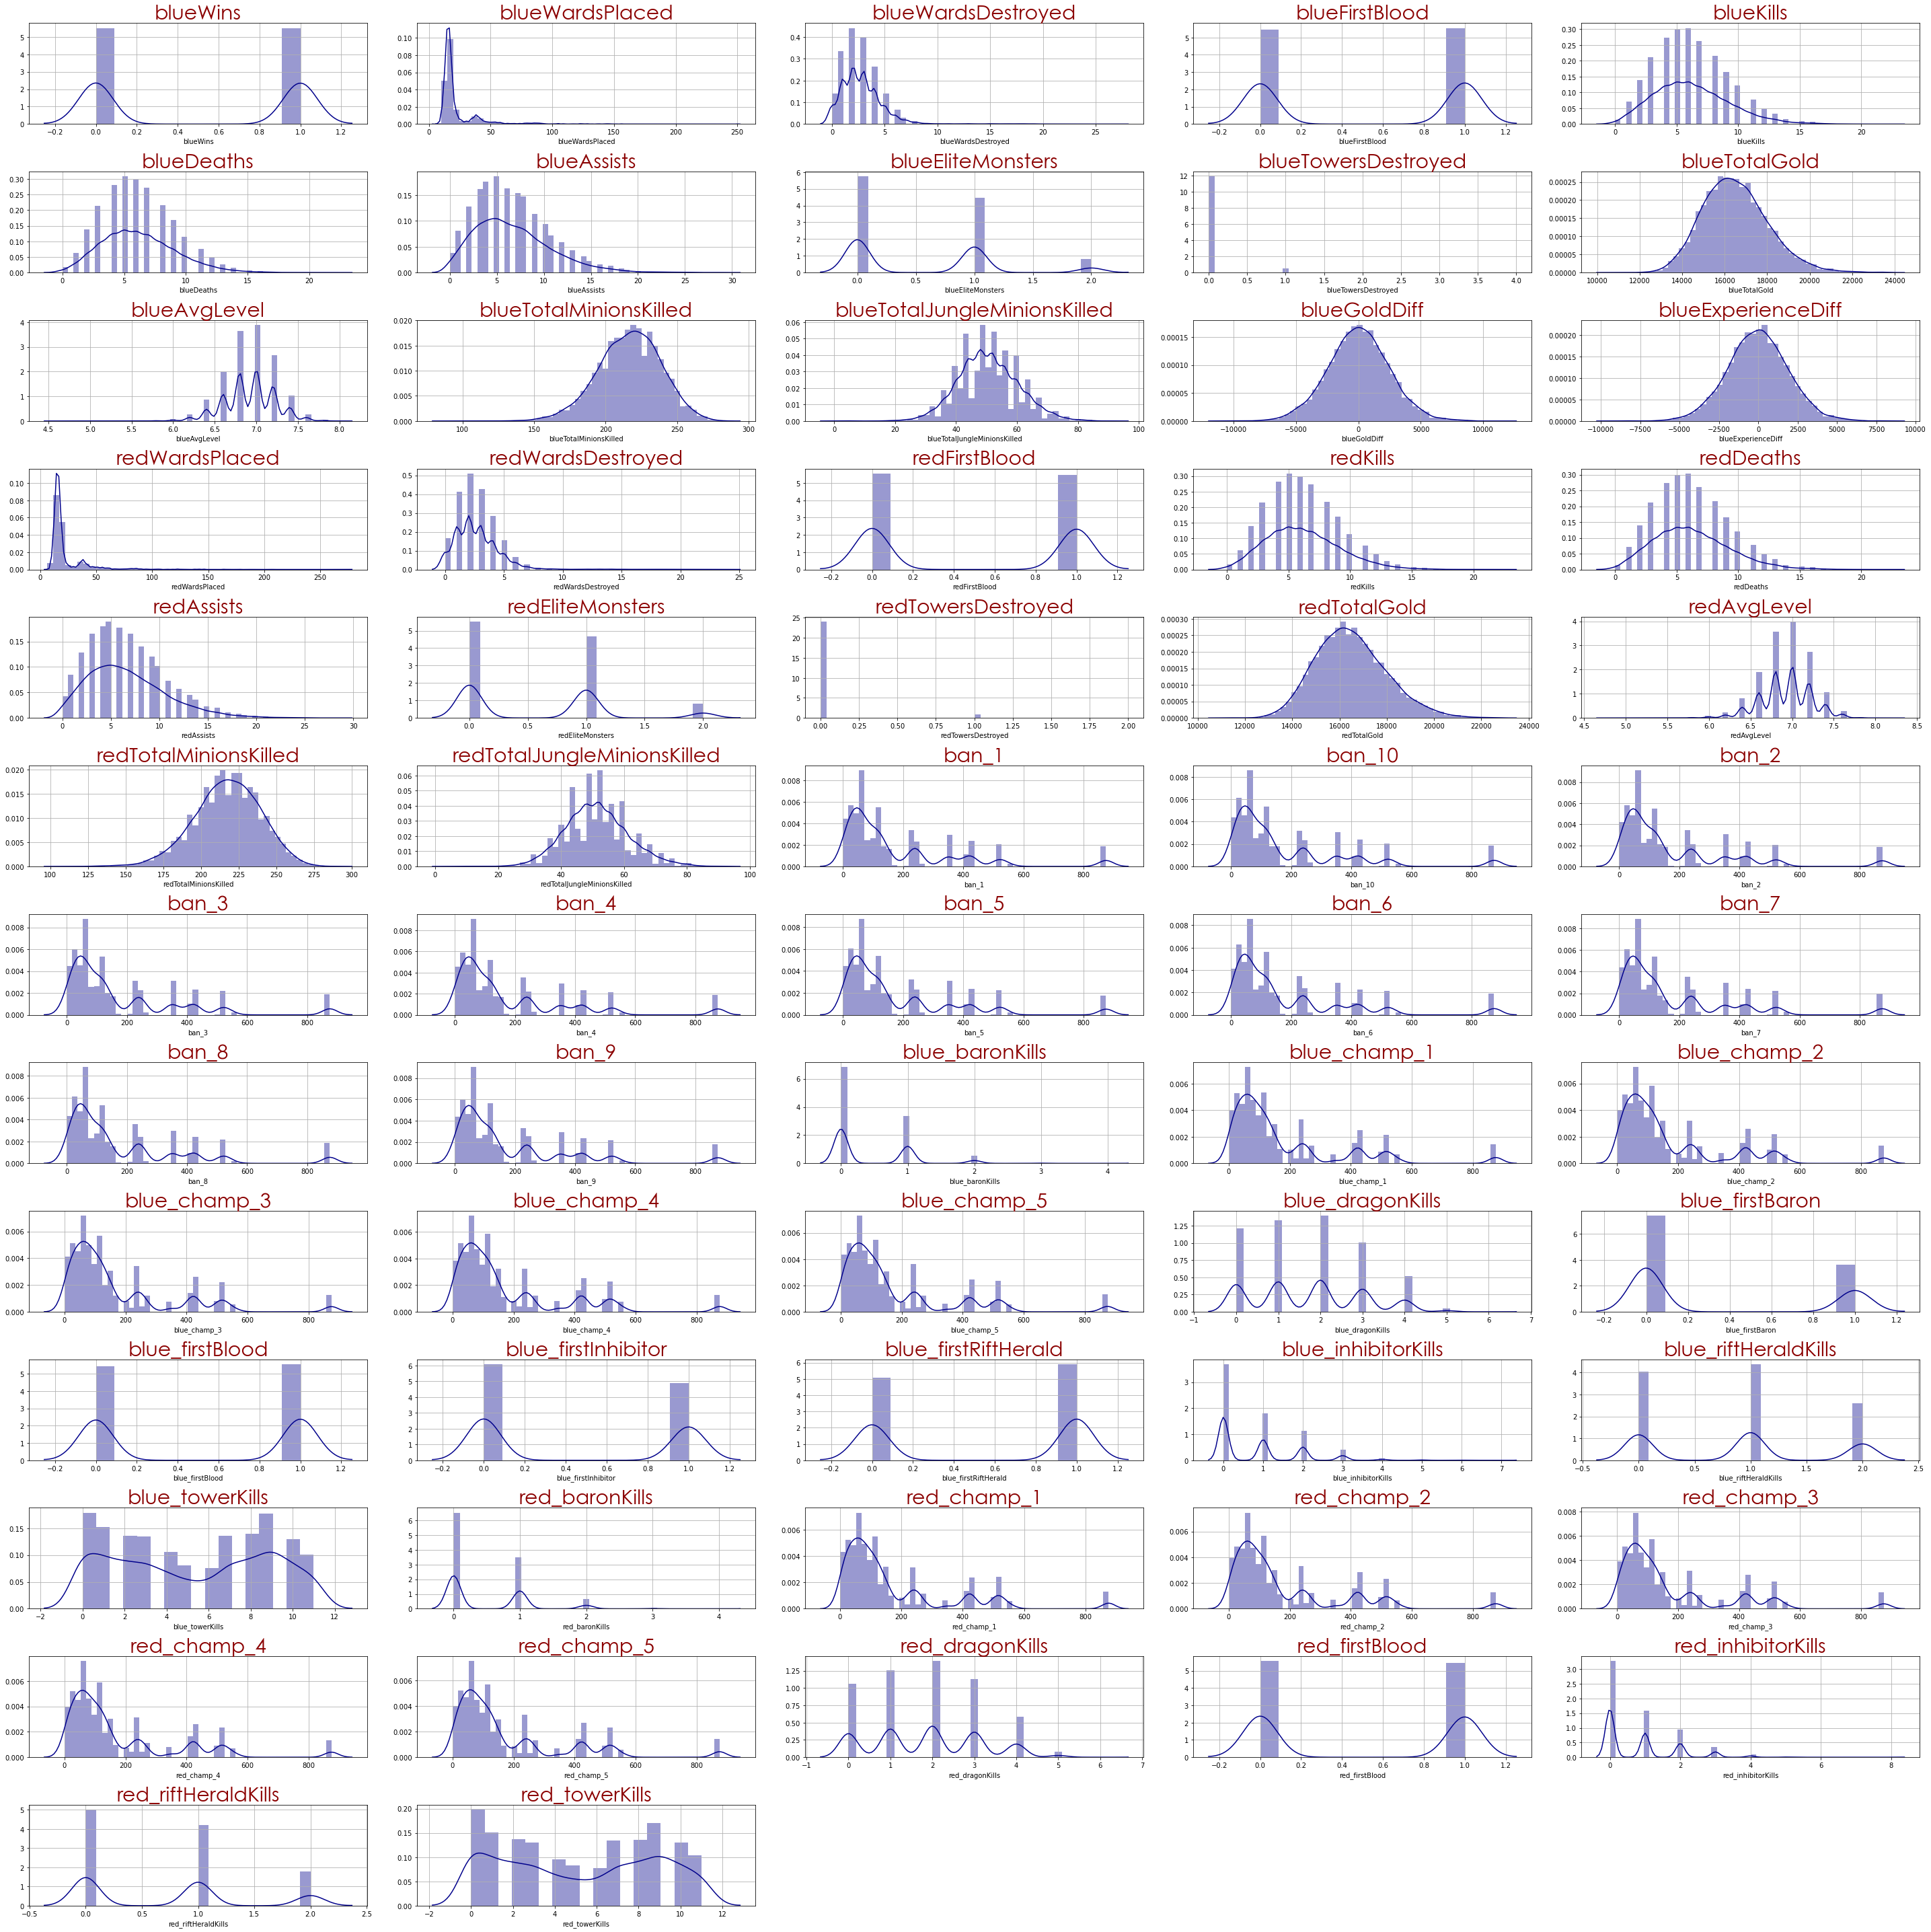

In [17]:
plt.figure(figsize=(40,40))
title_style = {'family': 'Century Gothic', 'color': 'darkred', 'size': 30 }
for j,value in enumerate(columns):
    plt.subplot(13,5,j+1)
    sns.distplot(df[value], color = "darkblue" )
    plt.title(value,fontdict = title_style)
    plt.grid(True)
    
plt.tight_layout()   
plt.show()

In [18]:
df_corr = df.corr().T
df_corr

blueWins  blueWardsPlaced  blueWardsDestroyed  \
blueWins                1.000            0.000               0.044   
blueWardsPlaced         0.000            1.000               0.034   
blueWardsDestroyed      0.044            0.034               1.000   
blueFirstBlood          0.202            0.003               0.018   
blueKills               0.337            0.018               0.034   
...                       ...              ...                 ...   
red_dragonKills        -0.566            0.003              -0.035   
red_firstBlood         -0.202           -0.003              -0.018   
red_inhibitorKills     -0.659           -0.006              -0.016   
red_riftHeraldKills    -0.363           -0.006              -0.043   
red_towerKills         -0.809           -0.004              -0.034   

                     blueFirstBlood  blueKills  blueDeaths  blueAssists  \
blueWins                      0.202      0.337      -0.339        0.277   
blueWardsPlaced               0.003      0.018      -0.003        0.033   
blueWardsDestroyed            0.018      0.034      -0.073        0.068   
blueFirstBlood                1.000      0.269      -0.248        0.229   
blueKills                     0.269      1.000       0.004        0.814   
...                             ...        ...         ...          ...   
red_dragonKills              -0.174     -0.309       0.231       -0.259   
red_firstBlood               -1.000     -0.269       0.248       -0.229   
red_inhibitorKills           -0.136     -0.240       0.249       -0.194   
red_riftHeraldKills          -0.165     -0.293       0.262       -0.213   
red_towerKills               -0.200     -0.351       0.347       -0.284   

                     blueEliteMonsters  blueTowersDestroyed  blueTotalGold  \
blueWins                         0.222                0.116          0.417   
blueWardsPlaced                  0.020                0.009          0.020   
blueWardsDestroyed               0.042               -0.009          0.060   
blueFirstBlood                   0.152                0.083          0.312   
blueKills                        0.179                0.180          0.889   
...                                ...                  ...            ...   
red_dragonKills                 -0.344               -0.109         -0.336   
red_firstBlood                  -0.152               -0.083         -0.312   
red_inhibitorKills              -0.161               -0.086         -0.302   
red_riftHeraldKills             -0.292               -0.124         -0.354   
red_towerKills                  -0.232               -0.143         -0.444   

                     blueAvgLevel  blueTotalMinionsKilled  \
blueWins                    0.358                   0.225   
blueWardsPlaced             0.034                  -0.034   
blueWardsDestroyed          0.060                   0.111   
blueFirstBlood              0.178                   0.126   
blueKills                   0.435                  -0.031   
...                           ...                     ...   
red_dragonKills            -0.242                  -0.116   
red_firstBlood             -0.178                  -0.126   
red_inhibitorKills         -0.263                  -0.184   
red_riftHeraldKills        -0.288                  -0.178   
red_towerKills             -0.371                  -0.258   

                     blueTotalJungleMinionsKilled  blueGoldDiff  \
blueWins                                    0.131         0.511   
blueWardsPlaced                             0.011         0.016   
blueWardsDestroyed                         -0.023         0.079   
blueFirstBlood                              0.018         0.379   
blueKills                                  -0.113         0.654   
...                                           ...           ...   
red_dragonKills                            -0.082        -0.387   
red_firstBlood                             -0.018        -0.379   
red_in

In [19]:
[col for col in df_corr.columns if any((df_corr[col]>0.90)& (df_corr[col]<1.00))]  

[]

In [20]:
df.corr()['blueWins'].sort_values(ascending=False).head(50)

blueWins                        1.000
blue_towerKills                 0.807
blue_firstInhibitor             0.761
blue_inhibitorKills             0.661
blue_dragonKills                0.563
blueGoldDiff                    0.511
blueExperienceDiff              0.490
blue_firstBaron                 0.451
blue_baronKills                 0.444
blueTotalGold                   0.417
blueAvgLevel                    0.358
blue_riftHeraldKills            0.352
blueKills                       0.337
redDeaths                       0.337
blueAssists                     0.277
blue_firstRiftHerald            0.266
blueTotalMinionsKilled          0.225
blueEliteMonsters               0.222
blue_firstBlood                 0.202
blueFirstBlood                  0.202
blueTotalJungleMinionsKilled    0.131
blueTowersDestroyed             0.116
blueWardsDestroyed              0.044
red_champ_5                     0.026
ban_5                           0.021
ban_7                           0.017
blue_champ_3

# --------------------------------------------------EDA--------------------------------------------------------

In [21]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
from plotly.subplots import make_subplots

In [22]:
blueWin = df[df["blueWins"]==1]
redWin = df[df["blueWins"]==0]

## Blue Wards Destroyed

In [23]:
fig = go.Figure(data=[
    go.Histogram(name='Blue Win', x=blueWin['blueWardsDestroyed']),
    go.Histogram(name='Red Win', x=redWin['blueWardsDestroyed']),
])

fig.update_layout(
    title='Blue Wards Destroyed Distribution',
    height=600,
    width=700
)

iplot(fig)

In [24]:
fig = go.Figure(data=[
    go.Histogram(name='Blue Win', x=blueWin['redWardsDestroyed']),
    go.Histogram(name='Red Win', x=redWin['redWardsDestroyed']),
])

fig.update_layout(
    title='Red Wards Destroyed Distribution',
    height=600,
    width=700
)

iplot(fig)

## Blue First Blood

In [25]:
fig = go.Figure(data=[
    go.Histogram(name='Blue Win', x=blueWin['blueFirstBlood']),
    go.Histogram(name='Red Win', x=redWin['blueFirstBlood']),
])

fig.update_layout(
    title='Blue First Blood',
    height=600,
    width=700
)

iplot(fig)

## Blue Kills

In [26]:
fig = go.Figure(data=[
    go.Histogram(name='Blue Win', x=blueWin['blueKills']),
    go.Histogram(name='Red Win', x=redWin['blueKills']),
])

fig.update_layout(
    title='Kills of Blue Team',
    height=600,
    width=700
)

iplot(fig)

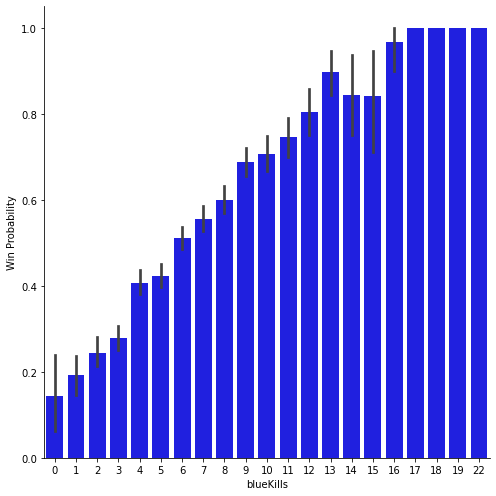

In [27]:
g = sns.factorplot(x="blueKills",y="blueWins", data=df,kind="bar",height=7,color="blue")
g.set_ylabels("Win Probability")
plt.show()

## Blue Deaths

In [28]:
fig = go.Figure(data=[
    go.Histogram(name='Blue Win', x=blueWin['blueDeaths']),
    go.Histogram(name='Red Win', x=redWin['blueDeaths']),
])

fig.update_layout(
    title='Death of Blue Team',
    height=600,
    width=700
)

iplot(fig)

## Assists of Blue Team

In [29]:
fig = go.Figure(data=[
    go.Histogram(name='Blue Win', x=blueWin['blueAssists']),
    go.Histogram(name='Red Win', x=redWin['blueAssists']),
])

fig.update_layout(
    title='Assists of Blue Team',
    height=700,
    width=700
)

iplot(fig)

In [30]:
fig = go.Figure(data=[
    go.Bar(name='Blue Win', x=[0], y=[np.mean(blueWin['blueAssists'])], width=0.5),
    go.Bar(name='Blue Loss', x=[1], y=[np.mean(redWin['blueAssists'])], width=0.5),
])

fig.update_layout(
    title='Average Assists of Blue Team',
    height=500,
    width=500,
    xaxis=dict(
        tickvals=[i for i in range(2)],
        ticktext=[i for i in ['Blue Win', 'Red Win']],
        showticklabels=True
    ),
)

iplot(fig)

## Towers Destroyed 

In [31]:
 fig = go.Figure(data=[
    go.Histogram(name='Blue Win', x=blueWin['blueTowersDestroyed']),
    go.Histogram(name='Blue Loss', x=redWin['blueTowersDestroyed']),
])

fig.update_layout(
    title='Towers Destroyed Blue Team',
    height=500,
    width=600,
)

iplot(fig)

## Elite Monsters

In [32]:
fig = go.Figure(data=[
    go.Histogram(name='Blue Win', x=blueWin['blueEliteMonsters']),
    go.Histogram(name='Blue Loss', x=redWin['blueEliteMonsters']),
  
])

fig.update_layout(
    title='Elite Monsters',
    height=500,
    width=600,
)

iplot(fig)

In [33]:
fig = go.Figure(data=[
    go.Bar(name='Blue Win', x=[0], y=[np.sum(blueWin['blueEliteMonsters'])], width=0.5 ),
    go.Bar(name='Blue Loss', x=[1], y=[np.sum(redWin['blueEliteMonsters'])], width=0.5),
    go.Bar(name='Red Win', x=[2], y=[np.sum(redWin['redEliteMonsters'])], width=0.5),
    go.Bar(name='Red Loss', x=[3], y=[np.sum(blueWin['redEliteMonsters'])], width=0.5)
])

fig.update_layout(
    title='Elite Monsters Killed',
    height=600,
    width=600,
    xaxis=dict(
        tickvals=[i for i in range(4)],
        ticktext=[i for i in ['Blue Win', 'Blue Loss', 'Red Win', 'Red Loss']],
        showticklabels=True
    ),
)

iplot(fig)

## First Inhibitor

In [35]:
blue_win_finhibit = blueWin[blueWin['blue_firstInhibitor'] == 1]
blue_win_ninhibit = blueWin[blueWin['blue_firstInhibitor'] == 0]


fig = go.Figure(data=[
    go.Pie(
        labels=['Blue Win with First Inhibitor', 'Blue Win without First Inhibitor'],
        values=[np.sum(blue_win_finhibit['blueWins']), np.sum(blue_win_ninhibit['blueWins'])]
    )
])

fig.update_layout(
    title='Blue Wins With and Without First Inhibitor',
    height=600,
    width=600
)

iplot(fig)

# ------------------------------------------Machine Learning---------------------------------------------

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.model_selection import GridSearchCV 
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

In [37]:
def get_confusion_matrix(algorithm, y_pred, y_actual):
    con = confusion_matrix(y_test, y_pred)
    tp, fn, fp, tn = con[0][0], con[0][1], con[1][0], con[1][1]
    algorithm = algorithm
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    f_score = (2 * precision * recall) / (recall + precision)
    return algorithm, accuracy, recall, precision, f_score

In [38]:
from prettytable import PrettyTable
best = PrettyTable()
best.field_names = ['Algorithm', 'Accuracy', 'Recall', 'Precision', 'F-Score']

In [39]:
cols = ['ban_1', 'ban_10', 'ban_2', 'ban_3', 'ban_4', 'ban_5', 'ban_6', 'ban_7',
       'ban_8', 'ban_9', 'blue_baronKills', 'blue_champ_1', 'blue_champ_2',
       'blue_champ_3', 'blue_champ_4', 'blue_champ_5', 'red_champ_1', 'red_champ_2',
       'red_champ_3', 'red_champ_4', 'red_champ_5']

In [40]:
df.drop(cols,axis=1,inplace=True)

## Logistic Regression

In [41]:
X = df.drop("blueWins",axis = 1)
y = df["blueWins"]

In [42]:
def LogRegModel(X,y):
    
    logReg = LogisticRegression()
    parameters = {
        'penalty' : ["l1","l2"],
        'C' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100],
        'n_jobs' :[-1]}
    gsearch = GridSearchCV(estimator = logReg, param_grid = parameters,
                       cv = 5,return_train_score=True
                      )
    gsearch.fit(X,y)
    
    print("Best Parameters : ", gsearch.best_params_)
    print("Best Score      : ", gsearch.best_score_)
    print("**************************************************")
    results = gsearch.cv_results_
    df_ = pd.DataFrame(results)
    df_ = df_[['param_penalty','param_C', 'mean_test_score','mean_train_score']]
    df_= df_.sort_values(by='mean_test_score', ascending = False)
    df_.head()
    return df_.head()

In [43]:
LogRegModel(X,y)

Best Parameters :  {'C': 0.1, 'n_jobs': -1, 'penalty': 'l2'}
Best Score      :  0.9672029928765438
**************************************************


param_penalty param_C  mean_test_score  mean_train_score
9             l2   0.100            0.967             0.967
13            l2       1            0.967             0.967
15            l2      10            0.967             0.967
7             l2   0.050            0.967             0.967
17            l2     100            0.967             0.967

In [44]:
df["DiffWards"] = df["blueWardsPlaced"] - df["redWardsPlaced"]
df["DiffWardsDestroyed"] = df["blueWardsDestroyed"] - df["redWardsDestroyed"]
df["DiffTotalMinionsKilled"] = df["blueTotalMinionsKilled"] - df["redTotalMinionsKilled"]
df["DiffKills"] = df["blueKills"] - df["redKills"]
df["DiffEliteMonsters"] = df["blueAssists"] - df["redAssists"]
df["DiffWards"] = df["blueEliteMonsters"] - df["redEliteMonsters"]
df["DiffTowersDestroyed"] = df["blueTowersDestroyed"] - df["redTowersDestroyed"]
df["DiffAssist"] = df["blueAssists"] - df["redAssists"]
df['DiffDeath']=df['blueDeaths']-df['redDeaths']
df['DiffAvgLevel']=df['blueAvgLevel']-df['redAvgLevel']
df['DiffTowerKills']=df['blue_towerKills']-df['red_towerKills']
df['DiffHeraldsKills']=df['blue_riftHeraldKills']-df['red_riftHeraldKills']
df['DiffInhibitorKills']=df['blue_inhibitorKills']-df['red_inhibitorKills']
df["DiffDragonKills"] = df["blue_dragonKills"]-df["red_dragonKills"]

In [140]:
X_ =df[['DiffWards',
       'DiffWardsDestroyed', 'DiffTotalMinionsKilled', 'DiffKills',
       'DiffEliteMonsters', 'DiffTowersDestroyed','blueGoldDiff','blueExperienceDiff','DiffAssist',
       'blueFirstBlood','DiffDeath','DiffAvgLevel','DiffTowerKills','DiffHeraldsKills',
        'blue_firstInhibitor','blue_firstBaron','blue_riftHeraldKills','DiffInhibitorKills','DiffDragonKills'
      ]]

In [139]:
df.corr()['blueWins'].sort_values(ascending=False).head(35)

blueWins                       1.000
DiffTowerKills                 0.893
blue_towerKills                0.807
DiffInhibitorKills             0.780
blue_firstInhibitor            0.761
blue_inhibitorKills            0.661
DiffDragonKills                0.638
blue_dragonKills               0.563
blueGoldDiff                   0.511
blueExperienceDiff             0.490
DiffKills                      0.479
DiffAvgLevel                   0.453
blue_firstBaron                0.451
blueTotalGold                  0.417
DiffAssist                     0.386
DiffEliteMonsters              0.386
DiffHeraldsKills               0.383
blueAvgLevel                   0.358
blue_riftHeraldKills           0.352
redDeaths                      0.337
blueKills                      0.337
DiffTotalMinionsKilled         0.309
blueAssists                    0.277
blue_firstRiftHerald           0.266
DiffWards                      0.260
blueTotalMinionsKilled         0.225
blueEliteMonsters              0.222
b

In [47]:
LogRegModel(X_,y)

Best Parameters :  {'C': 1, 'n_jobs': -1, 'penalty': 'l2'}
Best Score      :  0.9734789627427869
**************************************************


param_penalty param_C  mean_test_score  mean_train_score
13            l2       1            0.973             0.974
17            l2     100            0.973             0.974
5             l2   0.010            0.973             0.973
15            l2      10            0.973             0.973
7             l2   0.050            0.973             0.974

In [168]:
X_train, X_test, y_train, y_test =  train_test_split(X_, y, test_size=0.20, random_state=420)

In [169]:
logReg = LogisticRegression(C = 0.1,penalty = "l2")
logReg.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [170]:
X_pred = logReg.predict(X_train)
X_predT = logReg.predict(X_test)
print(classification_report(y_test,X_predT))


              precision    recall  f1-score   support

           0       0.97      0.98      0.97       948
           1       0.98      0.97      0.98      1028

    accuracy                           0.97      1976
   macro avg       0.97      0.97      0.97      1976
weighted avg       0.97      0.97      0.97      1976



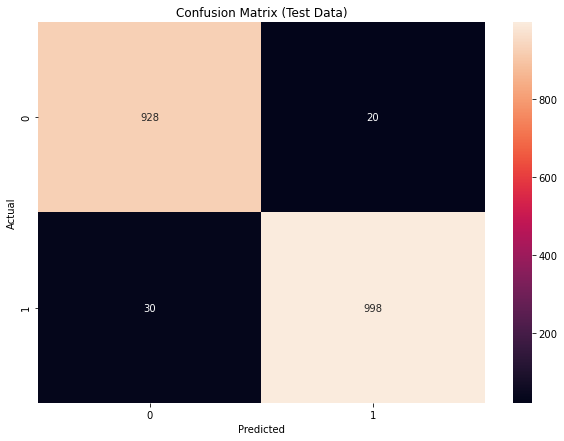

In [171]:
logM = confusion_matrix(y_test,X_predT)
plt.figure(figsize=(10,7))
ax = sns.heatmap(logM, annot=True, fmt='g')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
_ = ax.set_title('Confusion Matrix (Test Data)')

In [172]:
test_prediction_proba = logReg.predict_proba(X_test)[:,1]

In [173]:
logReg.score(X_test,y_test)

0.9746963562753036

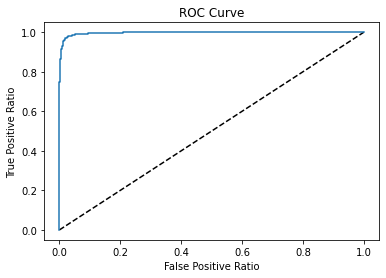

In [174]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, test_prediction_proba)

import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)

plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve')

plt.show()

In [175]:
print('AUC value : ', roc_auc_score(y_test, test_prediction_proba))

AUC value :  0.9968713572706825


In [176]:
y_pred = logReg.predict(X_test)
algorithm, accuracy, recall, precision, f_score = get_confusion_matrix('LR', y_pred, y_test)
best.add_row([algorithm, round(accuracy,5), round(recall,5),
               round(precision,5), round(f_score,5)])

## KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() 
grid = {"n_neighbors":np.arange(1,15),
       "p": np.arange(1,2,0.1)}
clf_knn = GridSearchCV(knn, grid, cv=5,return_train_score=True)
clf_knn.fit(X_,y) 


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'p': array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])},
             return_train_score=True)

In [57]:
print("Best Parameters : ", clf_knn.best_params_)
print("Best Score      : ", clf_knn.best_score_)

Best Parameters :  {'n_neighbors': 13, 'p': 1.0}
Best Score      :  0.7495691590221905


In [58]:
results = clf_knn.cv_results_
df_ = pd.DataFrame(results)
df_ = df_[['param_n_neighbors','param_p', 'mean_test_score','mean_train_score']]
df_= df_.sort_values(by='mean_test_score', ascending = False)
df_.head()

param_n_neighbors param_p  mean_test_score  mean_train_score
120                13   1.000            0.750             0.787
130                14   1.000            0.747             0.784
100                11   1.000            0.746             0.792
110                12   1.000            0.746             0.788
60                  7   1.000            0.745             0.812

In [178]:
knn = KNeighborsClassifier(n_neighbors= 13, p= 1.2000000000000002)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13, p=1.2000000000000002)

In [179]:
y_pred = knn.predict(X_test)
algorithm, accuracy, recall, precision, f_score = get_confusion_matrix('KNN', y_pred, y_test)
best.add_row([algorithm, round(accuracy,5), round(recall,5),
               round(precision,5), round(f_score,5)])

## Decision Tree

In [61]:
parameters = {'criterion': ["gini","entropy"],
              'max_depth': np.arange(1,5),
             'min_samples_leaf': np.arange(1,15),
              'min_samples_split': np.arange(1,10)}
gridD = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5,return_train_score=True)
gridD.fit(X_, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             return_train_score=True)

In [62]:
print("Best Parameters : ", gridD.best_params_)
print("Best Score      : ", gridD.best_score_)

Best Parameters :  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 7, 'min_samples_split': 2}
Best Score      :  0.9662919079587967


In [63]:
results = gridD.cv_results_
df_ = pd.DataFrame(results)
df_
df_ = df_[['param_criterion','param_max_depth', 'param_min_samples_leaf','param_min_samples_split',
'mean_test_score','mean_train_score']]
df_= df_.sort_values(by='mean_test_score', ascending = False)
df_.head()

param_criterion param_max_depth param_min_samples_leaf  \
440            gini               4                      7   
439            gini               4                      7   
437            gini               4                      7   
436            gini               4                      7   
435            gini               4                      7   

    param_min_samples_split  mean_test_score  mean_train_score  
440                       9            0.966             0.970  
439                       8            0.966             0.970  
437                       6            0.966             0.970  
436                       5            0.966             0.970  
435                       4            0.966             0.970

In [64]:
decisionTree = DecisionTreeClassifier(criterion= 'entropy',max_depth= 1,min_samples_leaf= 1, min_samples_split= 2)
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [65]:
X_pred = decisionTree.predict(X_train)
X_predT = decisionTree.predict(X_test)
print(classification_report(y_test,X_predT))


              precision    recall  f1-score   support

           0       0.95      0.97      0.96       971
           1       0.97      0.95      0.96      1005

    accuracy                           0.96      1976
   macro avg       0.96      0.96      0.96      1976
weighted avg       0.96      0.96      0.96      1976



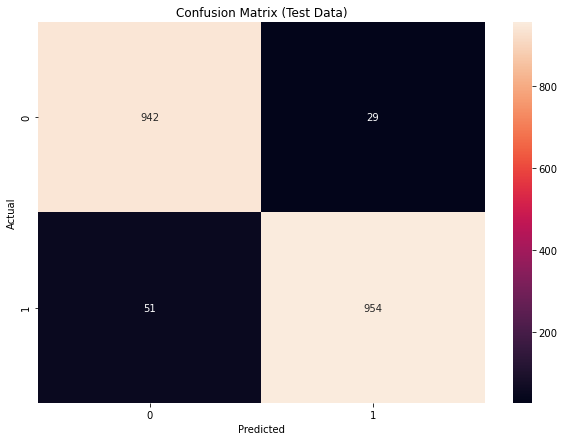

In [66]:
DecisionTreeM = confusion_matrix(y_test,X_predT)
plt.figure(figsize=(10,7))
ax = sns.heatmap(DecisionTreeM, annot=True, fmt='g')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
_ = ax.set_title('Confusion Matrix (Test Data)')

In [182]:
y_pred = decisionTree.predict(X_test)
algorithm, accuracy, recall, precision, f_score = get_confusion_matrix('Decision Tree', y_pred, y_test)
best.add_row([algorithm, round(accuracy,5), round(recall,5),
               round(precision,5), round(f_score,5)])

## Random Forest

In [68]:
parameters = {'n_estimators': [10, 50, 100, 300],
              'max_depth': np.arange(1,5)
             }
gridS = GridSearchCV(RandomForestClassifier(), parameters, cv=5,return_train_score=True)
gridS.fit(X_, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([1, 2, 3, 4]),
                         'n_estimators': [10, 50, 100, 300]},
             return_train_score=True)

In [69]:
print("Best Parameters : ", gridS.best_params_)
print("Best Score      : ", gridS.best_score_)

Best Parameters :  {'max_depth': 4, 'n_estimators': 10}
Best Score      :  0.9664941833649362


In [70]:
results = gridS.cv_results_
df_ = pd.DataFrame(results)
df_ = df_[['param_n_estimators','param_max_depth', 'mean_test_score','mean_train_score']]
df_= df_.sort_values(by='mean_test_score', ascending = False)
df_.head()

param_n_estimators param_max_depth  mean_test_score  mean_train_score
12                 10               4            0.966             0.967
14                100               4            0.966             0.968
13                 50               4            0.966             0.968
15                300               4            0.966             0.968
9                  50               3            0.965             0.965

## 2-

In [71]:
parameters = {'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': np.arange(1,15),
              'min_samples_split': np.arange(1,10)
             }


rf2 = GridSearchCV(RandomForestClassifier(n_estimators = 300, max_depth = 4),
parameters, cv=5,return_train_score=True)
rf2.fit(X_, y)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=4, n_estimators=300),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             return_train_score=True)

In [72]:
print("Best Parameters : ", rf2.best_params_)
print("Best Score      : ", rf2.best_score_)

Best Parameters :  {'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 5}
Best Score      :  0.9673040537077846


In [73]:
results = rf2.cv_results_
df_ = pd.DataFrame(results)
df_ = df_[['param_max_features','param_min_samples_split', 'mean_test_score','mean_train_score']]
df_= df_.sort_values(by='mean_test_score', ascending = False)
df_.head()

param_max_features param_min_samples_split  mean_test_score  \
40                auto                       5            0.967   
97                auto                       8            0.967   
127               sqrt                       2            0.967   
172               sqrt                       2            0.967   
217               sqrt                       2            0.967   

     mean_train_score  
40              0.968  
97              0.968  
127             0.968  
172             0.968  
217             0.968

In [212]:
X_train, X_test, y_train, y_test =  train_test_split(X_, y, test_size=0.20, random_state=420)

In [213]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 300, max_depth=4, min_samples_leaf=7,
                           min_samples_split = 4)

In [214]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=7, min_samples_split=4,
                       n_estimators=300, random_state=42)

In [215]:
y_pred = rfc1.predict(X_test)
algorithm, accuracy, recall, precision, f_score = get_confusion_matrix('Random Forest', y_pred, y_test)
best.add_row([algorithm, round(accuracy,5), round(recall,5),
               round(precision,5), round(f_score,5)])

In [216]:
rfc1.score(X_test,y_test)

0.9676113360323887

In [217]:
rfc1.score(X_train,y_train)

0.9667214981652537

In [218]:
X_pred = rfc1.predict(X_train)
X_predT = rfc1.predict(X_test)
print(classification_report(y_test,X_predT))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       948
           1       0.97      0.97      0.97      1028

    accuracy                           0.97      1976
   macro avg       0.97      0.97      0.97      1976
weighted avg       0.97      0.97      0.97      1976



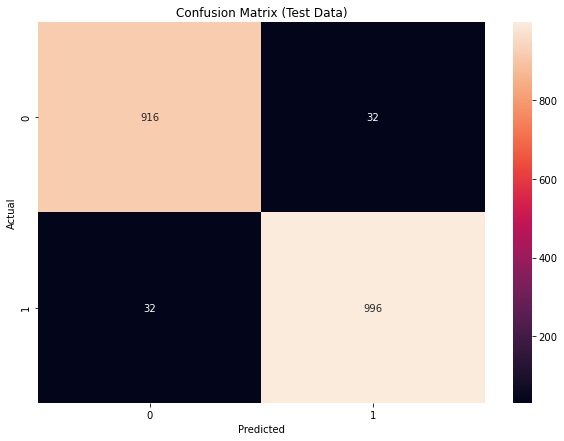

In [220]:
randomForestC = confusion_matrix(y_test,X_predT)
plt.figure(figsize=(10,7))
ax = sns.heatmap(randomForestC, annot=True, fmt='g')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
_ = ax.set_title('Confusion Matrix (Test Data)')

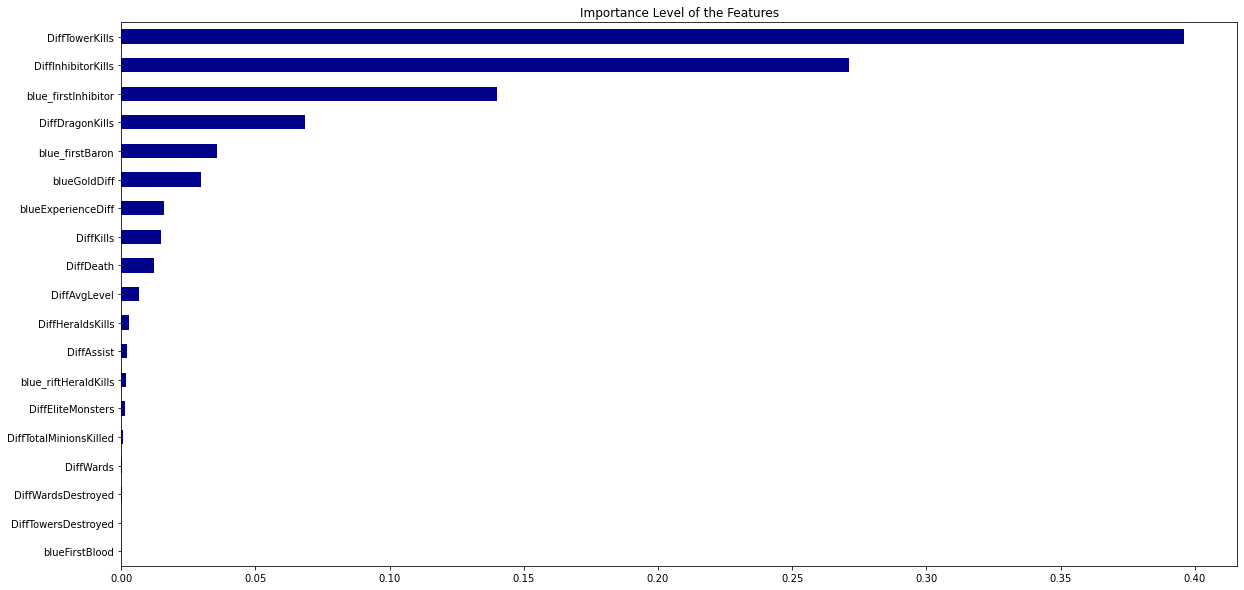

In [82]:
plt.figure(figsize=(20,10))
importance_level = pd.Series(data=rfc1.feature_importances_,
                        index= X_train.columns)

importance_level_sorted = importance_level.sort_values()

importance_level_sorted.plot(kind='barh', color='darkblue')
plt.title('Importance Level of the Features')
plt.show()

In [157]:
X_R = df[["DiffTowerKills","DiffInhibitorKills","blue_firstInhibitor","DiffDragonKills","blue_firstBaron",
          "blueGoldDiff","blueExperienceDiff","DiffKills","DiffDeath","DiffAvgLevel","DiffHeraldsKills","DiffAssist",
         "blue_riftHeraldKills","DiffEliteMonsters","DiffTotalMinionsKilled"
        ]]

In [184]:
X_train, X_test, y_train, y_test =  train_test_split(X_R, y, test_size=0.20, random_state=420)

In [185]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=7, min_samples_split=4,
                       n_estimators=300, random_state=42)

In [186]:
rfc1.score(X_test,y_test)

0.9671052631578947

In [187]:
rfc1.score(X_train,y_train)

0.9674807035303049

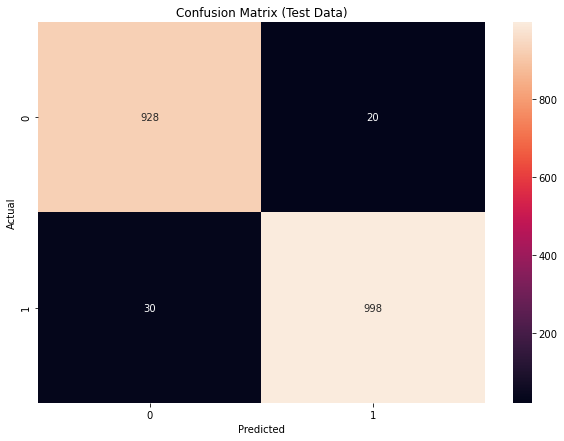

In [188]:
randomForestM = confusion_matrix(y_test,X_predT)
plt.figure(figsize=(10,7))
ax = sns.heatmap(randomForestM, annot=True, fmt='g')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
_ = ax.set_title('Confusion Matrix (Test Data)')

In [ ]:
y_pred = rfc1.predict(X_test)
algorithm, accuracy, recall, precision, f_score = get_confusion_matrix('Random Forest', y_pred, y_test)
best.add_row([algorithm, round(accuracy,5), round(recall,5),
               round(precision,5), round(f_score,5)])

## SVM

In [89]:
param_grid = {
        'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 20, 50, 70, 100],
        'gamma': ['scale', 'auto']
    }
gridSvm = GridSearchCV(SVC(), param_grid=param_grid, cv=5,return_train_score=True)
gridSvm.fit(X_, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 20, 50, 70, 100],
                         'gamma': ['scale', 'auto']},
             return_train_score=True)

In [90]:
print("Best Parameters : ", gridSvm.best_params_)
print("Best Score      : ", gridSvm.best_score_)

Best Parameters :  {'C': 100, 'gamma': 'scale'}
Best Score      :  0.9327863475631629


In [91]:
results = gridSvm.cv_results_
df_ = pd.DataFrame(results)
df_ = df_[['param_gamma','param_C', 'mean_test_score','mean_train_score']]
df_= df_.sort_values(by='mean_test_score', ascending = False)
df_.head()


param_gamma param_C  mean_test_score  mean_train_score
20       scale     100            0.933             0.934
18       scale      70            0.919             0.919
16       scale      50            0.900             0.902
14       scale      20            0.790             0.790
12       scale      10            0.754             0.755

## 2-

In [92]:
param_grid = {
        'kernel': ['rbf', 'poly', 'sigmoid'],
        'degree': [1, 2, 3, 4, 5]
    }
gridSvm2 = GridSearchCV(SVC(C = 100, gamma = 'scale'), param_grid=param_grid, cv=5,return_train_score=True)
gridSvm2.fit(X_, y)

GridSearchCV(cv=5, estimator=SVC(C=100),
             param_grid={'degree': [1, 2, 3, 4, 5],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             return_train_score=True)

In [93]:
print("Best Parameters : ", gridSvm2.best_params_)
print("Best Score      : ", gridSvm2.best_score_)

Best Parameters :  {'degree': 1, 'kernel': 'poly'}
Best Score      :  0.9545496335776148


In [94]:
results = gridSvm2.cv_results_
df_ = pd.DataFrame(results)
df_ = df_[['param_kernel','param_degree', 'mean_test_score','mean_train_score']]
df_= df_.sort_values(by='mean_test_score', ascending = False)
df_.head()


param_kernel param_degree  mean_test_score  mean_train_score
1         poly            1            0.955             0.955
0          rbf            1            0.933             0.934
3          rbf            2            0.933             0.934
6          rbf            3            0.933             0.934
9          rbf            4            0.933             0.934

In [197]:
X_train, X_test, y_train, y_test =  train_test_split(X_, y, test_size=0.20, random_state=420)

In [198]:
sv = SVC(C = 100, gamma = "scale",degree = 1,kernel="poly")

In [199]:
sv.fit(X_train, y_train)

SVC(C=100, degree=1, kernel='poly')

In [200]:
X_pred = sv.predict(X_train)
X_predT = sv.predict(X_test)
print(classification_report(y_test,X_predT))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       948
           1       0.96      0.96      0.96      1028

    accuracy                           0.96      1976
   macro avg       0.96      0.96      0.96      1976
weighted avg       0.96      0.96      0.96      1976



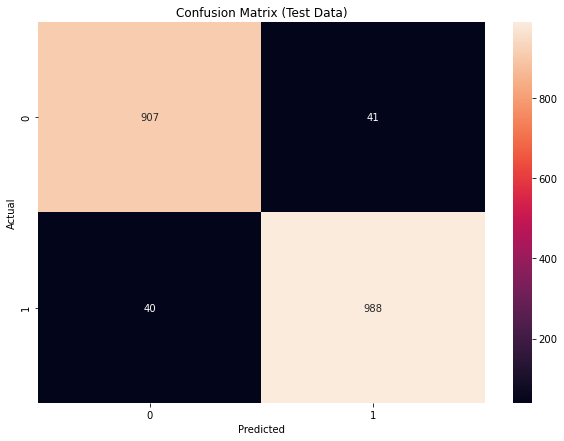

In [201]:
svmM = confusion_matrix(y_test,X_predT)
plt.figure(figsize=(10,7))
ax = sns.heatmap(svmM, annot=True, fmt='g')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
_ = ax.set_title('Confusion Matrix (Test Data)')

In [202]:
y_pred = sv.predict(X_test)
algorithm, accuracy, recall, precision, f_score = get_confusion_matrix('SVM', y_pred, y_test)
best.add_row([algorithm, round(accuracy,5), round(recall,5),
               round(precision,5), round(f_score,5)])

## XGBOOST

## 1-

In [101]:
params = {
        'n_estimators': [50,100,300,500],
        'max_depth': [1, 3, 5] }
model = xgb.XGBClassifier(tree_method='gpu_hist')
gridX = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy',return_train_score=True)
gridX.fit(X_, y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method='gpu_

In [102]:
print("Best Parameters : ", gridX.best_params_)
print("Best Score      : ", gridX.best_score_)

Best Parameters :  {'max_depth': 3, 'n_estimators': 50}
Best Score      :  0.9741875672628504


In [103]:
results = gridX.cv_results_
df_ = pd.DataFrame(results)
df_ = df_[['param_n_estimators','param_max_depth', 'mean_test_score','mean_train_score']]
df_= df_.sort_values(by='mean_test_score', ascending = False)
df_.head()

param_n_estimators param_max_depth  mean_test_score  mean_train_score
4                 50               3            0.974             0.983
5                100               3            0.974             0.990
3                500               1            0.974             0.979
2                300               1            0.974             0.978
8                 50               5            0.973             0.995

## 2-

In [104]:
params = {
     'min_child_weight':range(1,6,2),
    'learning_rate': [0.1,0.09,0.07,0.05]
}

model2 =  xgb.XGBClassifier(tree_method = "gpu_hist", max_depth = 3,n_estimators = 50)
grid2 = GridSearchCV(estimator=model2, param_grid=params, cv=5, scoring='accuracy',return_train_score=True)
grid2.fit(X_, y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=3, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=50, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method='gpu_hist

In [105]:
print("Best Parameters : ", grid2.best_params_)
print("Best Score      : ", grid2.best_score_)

Best Parameters :  {'learning_rate': 0.1, 'min_child_weight': 5}
Best Score      :  0.971049710449444


In [106]:
results = grid2.cv_results_
df_ = pd.DataFrame(results)
df_ = df_[['param_min_child_weight','param_learning_rate', 'mean_test_score','mean_train_score']]
df_= df_.sort_values(by='mean_test_score', ascending = False)
df_.head()

param_min_child_weight param_learning_rate  mean_test_score  \
2                      5               0.100            0.971   
1                      3               0.100            0.971   
0                      1               0.100            0.971   
4                      3               0.090            0.971   
5                      5               0.090            0.970   

   mean_train_score  
2             0.974  
1             0.974  
0             0.974  
4             0.974  
5             0.973

## 3- 

In [107]:
params = {
    'gamma':[i for i in np.arange(0,0.6,0.1)]
}

model3 =  xgb.XGBClassifier(tree_method = "gpu_hist", max_depth = 3,n_estimators = 50,min_child_weight = 5,
                            learning_rate = 0.1)
grid3 = GridSearchCV(estimator=model3, param_grid=params, cv=5, scoring='accuracy',return_train_score=True)
grid3.fit(X_, y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=3, min_child_weight=5,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=50, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method='gpu_hist',
 

In [108]:
print("Best Parameters : ", grid3.best_params_)
print("Best Score      : ", grid3.best_score_)

Best Parameters :  {'gamma': 0.4}
Best Score      :  0.9713533029262542


In [109]:
results = grid3.cv_results_
df_ = pd.DataFrame(results)
df_ = df_[['param_gamma', 'mean_test_score','mean_train_score']]
df_= df_.sort_values(by='mean_test_score', ascending = False)
df_.head()

param_gamma  mean_test_score  mean_train_score
4       0.400            0.971             0.974
0       0.000            0.971             0.974
1       0.100            0.971             0.974
2       0.200            0.971             0.974
5       0.500            0.971             0.974

## 4-

In [110]:
params = {
    'subsample':[i for i in np.arange(0.6,1, 0.1)],
 'colsample_bytree':[i for i in np.arange(0.6,1, 0.1)]
}

model4 =  xgb.XGBClassifier(tree_method = "gpu_hist", max_depth = 3,n_estimators = 50,min_child_weight = 5,
                            learning_rate = 0.01,gamma = 0.4)
grid4 = GridSearchCV(estimator=model4, param_grid=params, cv=5, scoring='accuracy',return_train_score=True)
grid4.fit(X_, y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=0.4,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_delta_step=None,
                                     max_depth=3, min_child_weight=5,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=50, n_jobs=None,
                                     nu...rallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method='gpu_hist',
  

In [111]:
print("Best Parameters : ", grid4.best_params_)
print("Best Score      : ", grid4.best_score_)

Best Parameters :  {'colsample_bytree': 0.8999999999999999, 'subsample': 0.6}
Best Score      :  0.9677091682468097


In [112]:
results = grid4.cv_results_
df_ = pd.DataFrame(results)
df_ = df_[['param_colsample_bytree','param_subsample', 'mean_test_score','mean_train_score']]
df_= df_.sort_values(by='mean_test_score', ascending = False)
df_.head()

param_colsample_bytree param_subsample  mean_test_score  mean_train_score
12                  0.900           0.600            0.968             0.969
10                  0.800           0.800            0.967             0.969
11                  0.800           0.900            0.967             0.969
13                  0.900           0.700            0.967             0.969
5                   0.700           0.700            0.967             0.969

## 5-

In [113]:
params = {
  'reg_alpha':[10**i for i in range (-5,5)]
}

model5 =  xgb.XGBClassifier(tree_method = "gpu_hist", max_depth = 3,n_estimators = 50,min_child_weight = 5,
                            learning_rate = 0.09,colsample_bytree= 0.8999999999999999, subsample= 0.6,gamma = 0.4) 
grid5 = GridSearchCV(estimator=model5, param_grid=params, cv=5, scoring='accuracy',return_train_score=True)
grid5.fit(X_, y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8999999999999999,
                                     gamma=0.4, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.09, max_delta_step=None,
                                     max_depth=3, min_child_weight=5,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=50, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=0.6,
            

In [114]:
print("Best Parameters : ", grid5.best_params_)
print("Best Score      : ", grid5.best_score_)

Best Parameters :  {'reg_alpha': 1e-05}
Best Score      :  0.9721628145339005


In [115]:
results = grid5.cv_results_
df_ = pd.DataFrame(results)
df_ = df_[['param_reg_alpha', 'mean_test_score','mean_train_score']]
df_= df_.sort_values(by='mean_test_score', ascending = False)
df_.head()

param_reg_alpha  mean_test_score  mean_train_score
0           0.000            0.972             0.974
1           0.000            0.972             0.974
2           0.001            0.972             0.974
3           0.010            0.972             0.974
4           0.100            0.972             0.974

In [116]:
xgboost = xgb.XGBClassifier(tree_method = "gpu_hist", max_depth = 3,n_estimators = 50,min_child_weight = 5,
                            learning_rate = 0.1,colsample_bytree= 0.8999999999999999, subsample= 0.6,reg_alpha= 0.1,
                            gamma = 0.4)

In [117]:
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8999999999999999,
              gamma=0.4, gpu_id=0, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=5, missing=nan,
              monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [118]:
X_pred = xgboost.predict(X_train)
X_predT = xgboost.predict(X_test)
print(classification_report(y_test,X_predT))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       971
           1       0.97      0.96      0.97      1005

    accuracy                           0.97      1976
   macro avg       0.97      0.97      0.97      1976
weighted avg       0.97      0.97      0.97      1976



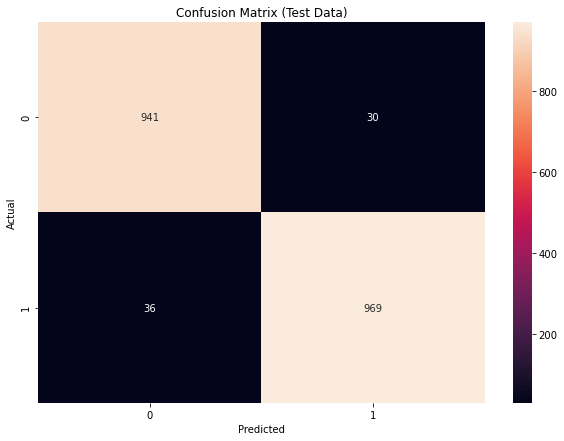

In [119]:
xgboostR = confusion_matrix(y_test,X_predT)
plt.figure(figsize=(10,7))
ax = sns.heatmap(xgboostR, annot=True, fmt='g')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
_ = ax.set_title('Confusion Matrix (Test Data)')

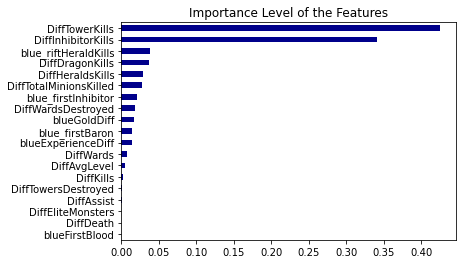

In [120]:
importance_level = pd.Series(data=xgboost.feature_importances_,
                        index= X_train.columns)

importance_level_sorted = importance_level.sort_values()

importance_level_sorted.plot(kind='barh', color='darkblue')
plt.title('Importance Level of the Features')
plt.show()

In [121]:
X_.columns

Index(['DiffWards', 'DiffWardsDestroyed', 'DiffTotalMinionsKilled',
       'DiffKills', 'DiffEliteMonsters', 'DiffTowersDestroyed', 'blueGoldDiff',
       'blueExperienceDiff', 'DiffAssist', 'blueFirstBlood', 'DiffDeath',
       'DiffAvgLevel', 'DiffTowerKills', 'DiffHeraldsKills',
       'blue_firstInhibitor', 'blue_firstBaron', 'blue_riftHeraldKills',
       'DiffInhibitorKills', 'DiffDragonKills'],
      dtype='object')

In [204]:
X__ = df[['DiffWards', 'DiffWardsDestroyed', 'DiffTotalMinionsKilled',
       'DiffKills', 'blueGoldDiff',
       'blueExperienceDiff',
       'DiffAvgLevel', 'DiffTowerKills', 'DiffHeraldsKills',
       'blue_firstInhibitor', 'blue_firstBaron', 'blue_riftHeraldKills',
       'DiffInhibitorKills', 'DiffDragonKills']]

In [205]:
X_train, X_test, y_train, y_test =  train_test_split(X__, y, test_size=0.20, random_state=420)

In [206]:
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8999999999999999,
              gamma=0.4, gpu_id=0, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=5, missing=nan,
              monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [207]:
xgboost.score(X_test,y_test)

0.9726720647773279

In [208]:
X_pred = xgboost.predict(X_train)
X_predT = xgboost.predict(X_test)
print(classification_report(y_test,X_predT))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       948
           1       0.98      0.97      0.97      1028

    accuracy                           0.97      1976
   macro avg       0.97      0.97      0.97      1976
weighted avg       0.97      0.97      0.97      1976



In [209]:
y_pred = xgboost.predict(X_test)
algorithm, accuracy, recall, precision, f_score = get_confusion_matrix('XGBoost', y_pred, y_test)
best.add_row([algorithm, round(accuracy,5), round(recall,5),
               round(precision,5), round(f_score,5)])

# Best Algoritms

In [210]:
print(best)

+---------------+----------+---------+-----------+---------+
|   Algorithm   | Accuracy |  Recall | Precision | F-Score |
+---------------+----------+---------+-----------+---------+
|       LR      |  0.9747  |  0.9789 |  0.96868  | 0.97377 |
|      KNN      | 0.74038  | 0.74051 |  0.72446  | 0.73239 |
| Decision Tree | 0.96609  | 0.97363 |  0.95648  | 0.96498 |
| Random Forest | 0.96761  | 0.96624 |  0.96624  | 0.96624 |
|      SVM      | 0.95901  | 0.95675 |  0.95776  | 0.95726 |
|    XGBoost    | 0.97267  | 0.97679 |   0.9666  | 0.97167 |
+---------------+----------+---------+-----------+---------+


# -------------------------------------------------------------------------------------------------------------

In [129]:
import scipy
import warnings
warnings.filterwarnings('ignore')
import graphviz

In [130]:
from pycaret.classification import *

In [131]:
log = logReg.get_params()
param1 = pd.DataFrame(log,index=["Logistic Reg"])
param1.T

Logistic Reg
C                        0.100
class_weight              None
dual                     False
fit_intercept             True
intercept_scaling            1
l1_ratio                  None
max_iter                   100
multi_class               auto
n_jobs                    None
penalty                     l2
random_state              None
solver                   lbfgs
tol                      0.000
verbose                      0
warm_start               False

In [132]:
xgbost =  xgboost.get_params()
param2 = pd.DataFrame(xgbost, index = ["Xgboost"])
param2.T

Xgboost
objective                                        binary:logistic
base_score                                                 0.500
booster                                                   gbtree
colsample_bylevel                                              1
colsample_bynode                                               1
colsample_bytree                                           0.900
gamma                                                      0.400
gpu_id                                                         0
importance_type                                             gain
interaction_constraints                                         
learning_rate                                              0.100
max_delta_step                                                 0
max_depth                                                      3
min_child_weight                                               5
missing                                                      NaN
monotone_constraints     (0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
n_estimators                                                  50
n_jobs                                                         0
num_parallel_tree                                              1
random_state                                                   0
reg_alpha                                                  0.100
reg_lambda                                                     1
scale_pos_weight                                               1
subsample                                                  0.600
tree_method                                             gpu_hist
validate_parameters                                            1
verbosity                                                   None

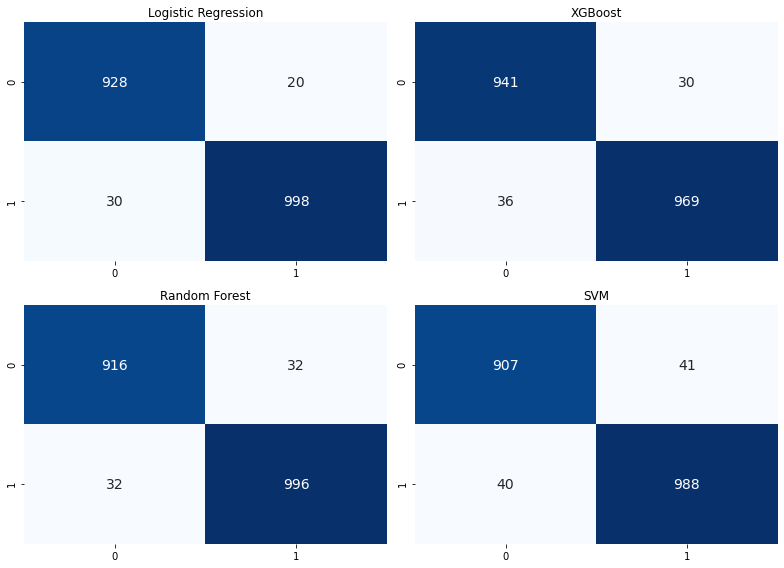

In [221]:
model_names = ["Logistic Regression", "XGBoost", "Random Forest", "SVM"]
model_results = [logM, xgboostR, randomForestC, svmM]

fig, axs = plt.subplots(2,2, figsize=(11, 8))
grid_counter = 0
for i in range(2):
    for j in range(2):
        sns.heatmap(model_results[grid_counter], cmap='Blues', cbar=False, annot=True,
                    fmt='g', annot_kws={'size': 14}, ax=axs[i][j])

        axs[i][j].title.set_text(model_names[grid_counter])

        grid_counter += 1
plt.tight_layout()
plt.show()

# Report

# -----------------------------------------------------------------------------------------------------------------

# Streamlit

In [ ]:
import joblib

In [ ]:
joblib.dump(df,"df.joblib")

In [ ]:
joblib.dump(logReg, "logReg.joblib")

In [ ]:
joblib.dump(decisionTree,"decisionTree.joblib")

In [ ]:
joblib.dump(rfc1,"rfc1.joblib")

In [ ]:
joblib.dump(sv,"sv.joblib")

In [ ]:
joblib.dump(xgboost,"xgboost.joblib")

In [ ]:
def prepro(X):
    X_S = X_
    return X_S


In [ ]:
X_S = X_

In [ ]:
X_S.to_csv('x_s.csv',index=False)

In [ ]:
joblib.dump(X_S,"X_S.joblib")

In [ ]:
joblib.dump(prepro,"prepro.joblib")